# Import Libraries

In [ ]:
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

In [ ]:

data = pd.read_csv(r"E:\Adversarial attack\MachineLearningCSV\samplled_dataset.csv")


data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,9101782,5,0,30,0,6,6,6.000000,0.000000,...,20,997.0,0.0,997,997,9100785.0,0.0,9100785,9100785,DDoS
1,21,8971397,9,15,115,188,27,0,12.777778,10.639288,...,32,0.0,0.0,0,0,0.0,0.0,0,0,FTP-Patator
2,80,11602599,8,5,371,11632,371,0,46.375000,131.168308,...,32,788.0,0.0,788,788,6599964.0,0.0,6599964,6599964,DoS GoldenEye
3,21,250,2,1,14,0,14,0,7.000000,9.899495,...,32,0.0,0.0,0,0,0.0,0.0,0,0,FTP-Patator
4,8193,42,1,1,0,6,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61376,49158,48,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
61377,80,11795861,8,5,442,11632,442,0,55.250000,156.270599,...,32,949.0,0.0,949,949,6791853.0,0.0,6791853,6791853,DoS GoldenEye
61378,54614,2,3,0,18,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
61379,22,13544213,21,32,2008,2745,640,0,95.619048,140.045163,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Patator


In [ ]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,9101782,5,0,30,0,6,6,6.000000,0.000000,...,20,997.0,0.0,997,997,9100785.0,0.0,9100785,9100785,DDoS
1,21,8971397,9,15,115,188,27,0,12.777778,10.639288,...,32,0.0,0.0,0,0,0.0,0.0,0,0,FTP-Patator
2,80,11602599,8,5,371,11632,371,0,46.375000,131.168308,...,32,788.0,0.0,788,788,6599964.0,0.0,6599964,6599964,DoS GoldenEye
3,21,250,2,1,14,0,14,0,7.000000,9.899495,...,32,0.0,0.0,0,0,0.0,0.0,0,0,FTP-Patator
4,8193,42,1,1,0,6,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61381 entries, 0 to 61380
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             61381 non-null  int64  
 1   Flow Duration                61381 non-null  int64  
 2   Total Fwd Packets            61381 non-null  int64  
 3   Total Backward Packets       61381 non-null  int64  
 4   Total Length of Fwd Packets  61381 non-null  int64  
 5   Total Length of Bwd Packets  61381 non-null  int64  
 6   Fwd Packet Length Max        61381 non-null  int64  
 7   Fwd Packet Length Min        61381 non-null  int64  
 8   Fwd Packet Length Mean       61381 non-null  float64
 9   Fwd Packet Length Std        61381 non-null  float64
 10  Bwd Packet Length Max        61381 non-null  int64  
 11  Bwd Packet Length Min        61381 non-null  int64  
 12  Bwd Packet Length Mean       61381 non-null  float64
 13  Bwd Packet Lengt

In [ ]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,61381.000000,6.138100e+04,61381.000000,61381.000000,6.138100e+04,6.138100e+04,61381.000000,61381.000000,61381.000000,61381.000000,...,61381.000000,61381.000000,6.138100e+04,6.138100e+04,6.138100e+04,6.138100e+04,6.138100e+04,6.138100e+04,6.138100e+04,6.138100e+04
mean,2571.304264,2.363696e+07,6.925254,6.051123,7.385948e+02,5.146662e+03,165.421987,13.896743,49.232542,54.736607,...,3.379287,29.796321,5.187742e+05,1.781695e+05,6.498808e+05,3.906729e+05,1.505644e+07,1.791855e+06,1.711291e+07,1.368396e+07
std,9717.846197,3.720443e+07,72.733536,74.067623,2.041107e+04,1.604301e+05,542.129308,127.778203,184.588300,163.974168,...,54.827674,6.357772,1.678230e+06,9.726202e+05,2.050230e+06,1.551308e+06,3.137515e+07,6.917708e+06,3.281295e+07,3.122315e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.560000e+02,2.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,4.865229e+06,3.000000,1.000000,2.600000e+01,6.000000e+00,14.000000,0.000000,7.142857,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,1.855650e+07,7.000000,5.000000,3.480000e+02,2.745000e+03,298.000000,0.000000,52.000000,110.582831,...,3.000000,32.000000,8.210000e+02,0.000000e+00,8.240000e+02,5.450000e+02,9.998710e+06,0.000000e+00,1.000000e+07,6.568462e+06
max,65420.000000,1.199999e+08,9449.000000,10063.000000,2.866110e+06,2.340090e+07,23360.000000,1983.000000,5940.857143,7049.469004,...,6323.000000,44.000000,3.430000e+07,2.610000e+07,4.240000e+07,2.620000e+07,1.200000e+08,7.250000e+07,1.200000e+08,1.200000e+08


In [ ]:
data.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

# Pre-Processing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Read the CSV file
data = pd.read_csv(r"E:\Adversarial attack\MachineLearningCSV\samplled_dataset.csv")

# Extract the 'Label' column
labels = data['Label']

# Drop the 'Label' column from the DataFrame
data.drop(columns=['Label'], inplace=True)

# Check for missing or infinite values
if data.isnull().values.any() or not np.isfinite(data.values).all():
    # Handle missing or infinite values

    data.fillna(data.mean(), inplace=True)
    # Replace infinite values with NaN, then fill them with a specific value
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.fillna(0, inplace=True)

#  normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled array back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Add the 'Label' column back to the DataFrame
data_scaled['Label'] = labels

# Save the normalized DataFrame back to the CSV file
data_scaled.to_csv(r"E:\Adversarial attack\MachineLearningCSV\output\normalized_dataset.csv", index=False)

# Print the normalized values
print("Normalized Dataset:")
print(data_scaled)

Normalized Dataset:
       Destination Port  Flow Duration  Total Fwd Packets  \
0              0.001223   7.584826e-02           0.000423   
1              0.000321   7.476172e-02           0.000847   
2              0.001223   9.668843e-02           0.000741   
3              0.000321   2.083336e-06           0.000106   
4              0.125237   3.500004e-07           0.000000   
...                 ...            ...                ...   
61376          0.751422   4.000004e-07           0.000000   
61377          0.001223   9.829895e-02           0.000741   
61378          0.834821   1.666668e-08           0.000212   
61379          0.000336   1.128686e-01           0.002117   
61380          0.001223   6.087583e-01           0.000741   

       Total Backward Packets  Total Length of Fwd Packets  \
0                    0.000000                 1.046715e-05   
1                    0.001491                 4.012407e-05   
2                    0.000497                 1.294437e-04   

# Feature Extraction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os

# Load  CSV data
data = pd.read_csv(r"E:\Adversarial attack\MachineLearningCSV\output\normalized_dataset.csv")

# Extract the label column and remove it from the dataset
labels = data['Label']
data.drop(columns=['Label'], inplace=True)

# Perform Standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=10)
features_pca = pca.fit_transform(features_scaled)

# Create a DataFrame for the transformed features
pca_columns = [f"PC{i}" for i in range(1, 11)]
features_pca_df = pd.DataFrame(data=features_pca, columns=pca_columns)

# Add the label column back to the DataFrame
features_pca_df['Label'] = labels

# Print the transformed features
print("Transformed Features:")
print(features_pca_df)

# Define the output directory and filename
output_directory = r"E:\Adversarial attack\MachineLearningCSV\output"
output_filename = "pca_transformed_features_with_label.csv"
output_path = os.path.join(output_directory, output_filename)

# Save the transformed features with the label to a CSV file
features_pca_df.to_csv(output_path, index=False)

Transformed Features:
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.469459 -0.374468  0.711259  1.260665 -0.617615  0.011329 -0.835937   
1     -2.068703  0.264124  0.623030 -1.115209 -0.330828 -1.087125  0.600809   
2      1.165585  1.588775 -4.818050 -0.870576 -0.278520  0.091561  1.165987   
3     -2.249717 -0.570107  1.313473  2.368055  0.169646  1.032813 -0.444268   
4     -2.582287 -0.110134  0.583640 -1.134696 -0.257019 -0.759314  0.659691   
...         ...       ...       ...       ...       ...       ...       ...   
61376 -2.667087 -0.110699  0.345992  0.086240 -0.185283 -1.296722 -0.479268   
61377  1.391363  1.707786 -5.209496 -0.865763 -0.189805  0.125551  1.246203   
61378 -3.149502 -0.405735  0.950653  3.019408  0.730499  2.042457 -5.143996   
61379 -1.581042  1.041874  0.288319 -1.172600  0.672639 -1.185404  0.914055   
61380  4.314648  0.248777 -2.505347  0.482636 -1.225178  2.426585 -1.719796   

            PC8       PC9    

# Feature Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
import os

# Load CSV data
data = pd.read_csv(r"E:\Adversarial attack\MachineLearningCSV\output\normalized_dataset.csv")

# Label encode the target variable 'Label'
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Extract the label column and remove it from the dataset
labels = data['Label']
data.drop(columns=['Label'], inplace=True)

# Perform Standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=10)
features_pca = pca.fit_transform(features_scaled)

# Perform Lasso regression for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(features_pca, labels)

# Extract feature importance from Lasso coefficients
feature_importance = np.abs(lasso.coef_)

# Select features with non-zero coefficients
selected_features_indices = feature_importance > 0

# Determine the indices of selected features in terms of PCA components
selected_feature_indices_pca = np.where(selected_features_indices)[0]

# Map selected feature indices back to original feature names
selected_features = [f"PC{i+1}" for i in selected_feature_indices_pca]

# Create a new DataFrame with selected features
selected_features_df = pd.DataFrame(features_pca[:, selected_feature_indices_pca], columns=selected_features)

# Add the label column back to the DataFrame
selected_features_df['Label'] = labels

# Reverse label encoding for the 'Label' column
selected_features_df['Label'] = label_encoder.inverse_transform(selected_features_df['Label'])

# Define the output directory and filename for selected features
output_directory = r"E:\Adversarial attack\MachineLearningCSV\output"
output_filename = "lasso_regression_output.csv"
output_path = os.path.join(output_directory, output_filename)

# Save the selected features to a CSV file
selected_features_df.to_csv(output_path, index=False)

print(f"Selected features after Lasso regression saved to: {output_path}")

Lasso regression output saved to: E:\Adversarial attack\MachineLearningCSV\output\lasso_regression_output.csv


# Label the Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load CSV data
data = pd.read_csv(r"E:\Adversarial attack\MachineLearningCSV\output\selected_features_after_lasso.csv")

# Label encode the 'Label' column
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Define a function to map 'attack' to 1 and 'non attack' to 0 for all labels
def map_labels(encoded_label):
    if encoded_label == label_encoder.transform(['Bot','DDoS','PortScan','DoS GoldenEye','FTP-Patator','Web Attack Brute Force','DoS Slowhttptest','DoS slowloris','SSH-Patator','Web Attack XSS','DoS Hulk','Heartbleed','Web Attack Sql Injection','Infiltration'])[0]:
        return 1
    else:
        return 0

# Apply the mapping function to the 'Label' column
data['Label'] = data['Label'].apply(map_labels)

# Save the preprocessed data
output_path = r"E:\Adversarial attack\MachineLearningCSV\label_encoded_data.csv"
data.to_csv(output_path, index=False)

print(f"Label encoded data saved to: {output_path}")

Label encoded data saved to: E:\Adversarial attack\MachineLearningCSV\label_encoded_data.csv


# Classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

# Load the preprocessed data
data = pd.read_csv(r"E:\Adversarial attack\MachineLearningCSV\label_encoded_data.csv")

# Separate features and labels
X = data.drop(columns=['Label'])
y = data['Label']

# Splitting the Normal Training set and Malicious Test set
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class GAN:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.generator = self.build_generator()
        self.discriminator = self.build_discriminator()
        self.gan = self.build_gan()

    def build_generator(self):
        generator = Sequential([
            Dense(64, activation='relu', input_dim=self.input_dim),
            Dense(self.input_dim, activation='tanh')
        ])
        return generator

    def build_discriminator(self):
        discriminator = Sequential([
            Dense(64, activation='relu', input_dim=self.input_dim),
            Dense(1, activation='sigmoid')
        ])
        discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return discriminator

    def build_gan(self):
        self.discriminator.trainable = False
        gan_input = Input(shape=(self.input_dim,))
        generated_data = self.generator(gan_input)
        gan_output = self.discriminator(generated_data)
        gan = Model(gan_input, gan_output)
        gan.compile(loss='binary_crossentropy', optimizer='adam')
        return gan

    def train(self, data, epochs=100, batch_size=128):
        for epoch in range(epochs):
            # Train discriminator
            real_data = data[np.random.randint(0, data.shape[0], batch_size)]
            fake_data = self.generator.predict(np.random.normal(0, 1, (batch_size, self.input_dim)))
            x_combined = np.concatenate([real_data, fake_data])
            y_combined = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
            d_loss = self.discriminator.train_on_batch(x_combined, y_combined)

            # Train generator
            noise = np.random.normal(0, 1, (batch_size, self.input_dim))
            y_gen = np.ones((batch_size, 1))
            g_loss = self.gan.train_on_batch(noise, y_gen)

            # Print progress
            if epoch % 10 == 0:
                print(f"Epoch {epoch}/{epochs} | Discriminator Loss: {d_loss[0]} | Generator Loss: {g_loss}")

    def generate_samples(self, n_samples):
        noise = np.random.normal(0, 1, (n_samples, self.input_dim))
        return self.generator.predict(noise)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the GAN using the training set
input_dim = X_train_scaled.shape[1]
gan = GAN(input_dim)
gan.train(X_train_scaled)

synthetic_samples = gan.generate_samples(len(X_train))

# Combine with the original training set
X_combined = np.concatenate([X_train_scaled, synthetic_samples])
y_combined = np.concatenate([y_train, np.ones(len(synthetic_samples))])


X_combined_scaled = scaler.fit_transform(X_combined)

classifier = SVC()
classifier.fit(X_combined_scaled, y_combined)

X_test_scaled = scaler.transform(X_test)
y_pred = classifier.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step
Epoch 0/100 | Discriminator Loss: 0.6954497694969177 | Generator Loss: 0.8060053586959839
4/4 [==============================] - 0s 2ms/step
Epoch 10/100 | Discriminator Loss: 0.7188292741775513 | Generator Loss: 0.7239285707473755
4/4 [==============================] - 0s 2ms/step
Epoch 20/100 | Discriminator Loss: 0.7220416069030762 | Generator Loss: 0.6372557878494263
4/4 [==============================] - 0s 2ms/step
Epoch 30/100 | Discriminator Loss: 0.74754798412323 | Generator Loss: 0.5897364616394043
4/4 [==============================] - 0s 2ms/step
Epoch 40/100 | Discriminator Loss: 0.7397856116294861 | Generator Loss: 0.5641579627990723
4/4 [==============================] - 0s 2ms/step
Epoch 50/100 | Discriminator Loss: 0.697585940361023 | Generator Loss: 0.6134237051010132
4/4 [==============================] - 0s 2ms/step
Epoch 60/100 | Discriminator Loss: 0.659565806388855 | Generator Loss: 0.6601790189743042
4/4 [======

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1 score for malicious and benign classes separately
def calculate_metrics(y_true, y_pred, label):
    # Accuracy
    accuracy = np.mean(y_pred[y_true == label] == label)

    # Precision
    precision = precision_score(y_true, y_pred, pos_label=label)

    # Recall
    recall = recall_score(y_true, y_pred, pos_label=label)

    # F1 Score
    f1 = f1_score(y_true, y_pred, pos_label=label)

    return accuracy, precision, recall, f1

# Calculate metrics for malicious class
malicious_accuracy, malicious_precision, malicious_recall, malicious_f1 = calculate_metrics(y_test, y_pred, label=1)

# Calculate metrics for benign class
benign_accuracy, benign_precision, benign_recall, benign_f1 = calculate_metrics(y_test, y_pred, label=0)

# Print the results
print("Metrics for Malicious Class:")
print("Accuracy:", malicious_accuracy)
print("Precision:", malicious_precision)
print("Recall:", malicious_recall)
print("F1 Score:", malicious_f1)
print()

print("Metrics for Benign Class:")
print("Accuracy:", benign_accuracy)
print("Precision:", benign_precision)
print("Recall:", benign_recall)
print("F1 Score:", benign_f1)

Metrics for Malicious Class:
Accuracy: 0.9074178403755869
Precision: 0.6835443037974683
Recall: 0.7767577961708888
F1 Score: 0.7489218328840971

Metrics for Benign Class:
Accuracy: 0.9358239810986414
Precision: 0.7067577961708889
Recall: 0.7858239810986414
F1 Score: 0.7512699479254158


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

# Load the preprocessed data
data = pd.read_csv(r"E:\Adversarial attack\MachineLearningCSV\label_encoded_data.csv")

# Separate features and labels
X = data.drop(columns=['Label'])
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class GAN:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.generator = self.build_generator()
        self.discriminator = self.build_discriminator()
        self.gan = self.build_gan()

    def build_generator(self):
        generator = Sequential([
            Dense(64, activation='relu', input_dim=self.input_dim),
            Dense(self.input_dim, activation='tanh')
        ])
        return generator

    def build_discriminator(self):
        discriminator = Sequential([
            Dense(64, activation='relu', input_dim=self.input_dim),
            Dense(1, activation='sigmoid')
        ])
        discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return discriminator

    def build_gan(self):
        self.discriminator.trainable = False
        gan_input = Input(shape=(self.input_dim,))
        generated_data = self.generator(gan_input)
        gan_output = self.discriminator(generated_data)
        gan = Model(gan_input, gan_output)
        gan.compile(loss='binary_crossentropy', optimizer='adam')
        return gan

    def train(self, data, epochs=100, batch_size=128):
        for epoch in range(epochs):
            # Train discriminator
            real_data = data[np.random.randint(0, data.shape[0], batch_size)]
            fake_data = self.generator.predict(np.random.normal(0, 1, (batch_size, self.input_dim)))
            x_combined = np.concatenate([real_data, fake_data])
            y_combined = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
            d_loss = self.discriminator.train_on_batch(x_combined, y_combined)

            # Train generator
            noise = np.random.normal(0, 1, (batch_size, self.input_dim))
            y_gen = np.ones((batch_size, 1))
            g_loss = self.gan.train_on_batch(noise, y_gen)

            # Print progress
            if epoch % 10 == 0:
                print(f"Epoch {epoch}/{epochs} | Discriminator Loss: {d_loss[0]} | Generator Loss: {g_loss}")

    def generate_samples(self, n_samples):
        noise = np.random.normal(0, 1, (n_samples, self.input_dim))
        return self.generator.predict(noise)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

input_dim = X_train_scaled.shape[1]
gan = GAN(input_dim)
gan.train(X_train_scaled)


synthetic_samples = gan.generate_samples(len(X_train))


X_combined = np.concatenate([X_train_scaled, synthetic_samples])
y_combined = np.concatenate([y_train, np.ones(len(synthetic_samples))])


X_combined_scaled = scaler.fit_transform(X_combined)


classifier = SVC()
classifier.fit(X_combined_scaled, y_combined)

X_test_scaled = scaler.transform(X_test)
y_pred = classifier.predict(X_test_scaled)

4/4 [==============================] - 0s 4ms/step
Epoch 0/100 | Discriminator Loss: 0.7303823232650757 | Generator Loss: 0.7675199508666992
4/4 [==============================] - 0s 2ms/step
Epoch 10/100 | Discriminator Loss: 0.7272483110427856 | Generator Loss: 0.6907902359962463
4/4 [==============================] - 0s 2ms/step
Epoch 20/100 | Discriminator Loss: 0.7073391675949097 | Generator Loss: 0.6408782005310059
4/4 [==============================] - 0s 2ms/step
Epoch 30/100 | Discriminator Loss: 0.6951035261154175 | Generator Loss: 0.6415095329284668
4/4 [==============================] - 0s 2ms/step
Epoch 40/100 | Discriminator Loss: 0.6619000434875488 | Generator Loss: 0.6752035617828369
4/4 [==============================] - 0s 2ms/step
Epoch 50/100 | Discriminator Loss: 0.6301913857460022 | Generator Loss: 0.7245847582817078
4/4 [==============================] - 0s 2ms/step
Epoch 60/100 | Discriminator Loss: 0.6077486276626587 | Generator Loss: 0.7506740689277649
4/4 [==

AUC Score: 0.9216159179981912


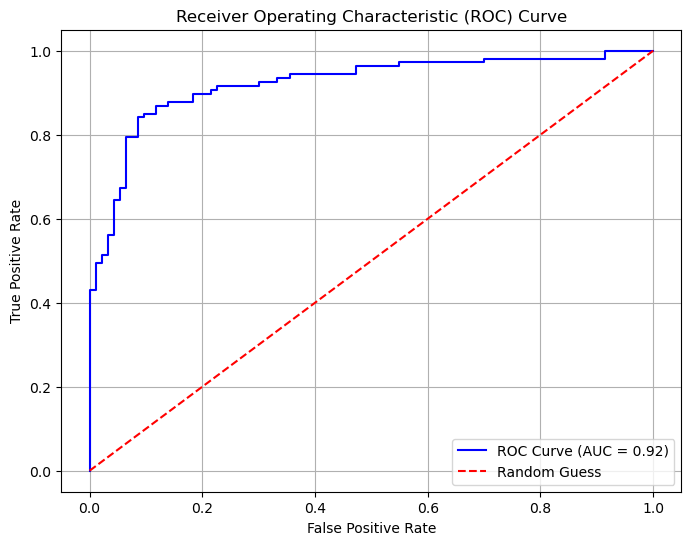

In [ ]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()